In [4]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
import os
from glob import glob

%matplotlib inline 

In [14]:
# glob(os.path.join('organise', '*', '*', '*', '*','*.png'))
all_scans_df = pd.DataFrame(dict(path = 
                                 glob(os.path.join('MURA-I', '*', '*', '*', '*','*.png'))))
# print(dict(path = glob(os.path.join('MURA-I', '*', '*', '*', '*','*.png'))))
all_scans_df['type'] = all_scans_df['path'].map(lambda x: x.split(os.sep)[1])
all_scans_df['body_part'] = all_scans_df['path'].map(lambda x: x.split(os.sep)[-4])
all_scans_df['patient_id'] = all_scans_df['path'].map(lambda x: x.split(os.sep)[-3])
all_scans_df['folder'] = all_scans_df['path'].map(lambda x: x.split(os.sep)[-2])
all_scans_df['study_label'] = all_scans_df['folder'].map(lambda x: x.split('_')[0])
all_scans_df['result'] = all_scans_df['folder'].map(lambda x: x.split('_')[-1] if '_' in x else nm.NAN )
all_scans_df.head()


,path,type,body_part,patient_id,folder,study_label,result
0,MURA-I\train\XR_ELBOW\patient00011\study1_nega...,train,XR_ELBOW,patient00011,study1_negative,study1,negative
1,MURA-I\train\XR_ELBOW\patient00011\study1_nega...,train,XR_ELBOW,patient00011,study1_negative,study1,negative
2,MURA-I\train\XR_ELBOW\patient00011\study1_nega...,train,XR_ELBOW,patient00011,study1_negative,study1,negative
3,MURA-I\train\XR_ELBOW\patient00016\study1_posi...,train,XR_ELBOW,patient00016,study1_positive,study1,positive
4,MURA-I\train\XR_ELBOW\patient00016\study1_posi...,train,XR_ELBOW,patient00016,study1_positive,study1,positive


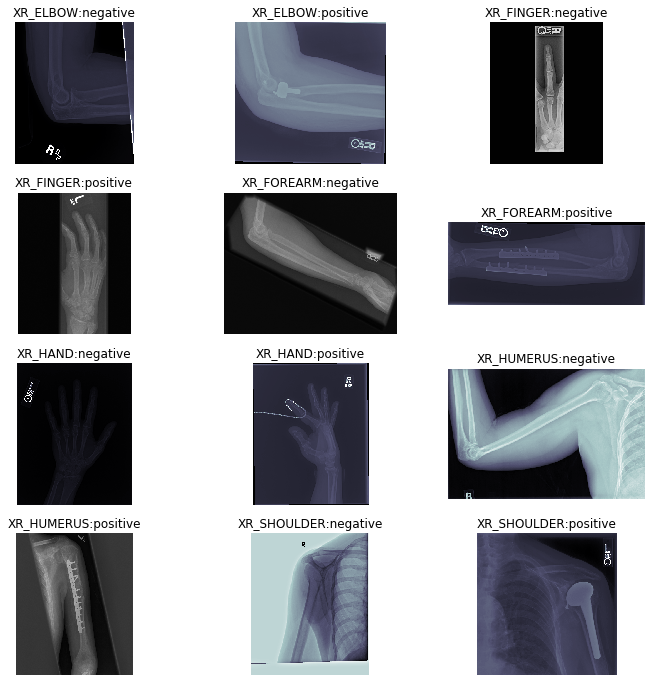

In [15]:
sub_df = all_scans_df.groupby(['body_part', 'result']).apply(lambda x: x.sample(1)).reset_index(drop = True)
sub_df.head()
fig, (m_axs) = plt.subplots(4, sub_df.shape[0]//4, figsize = (12, 12))
for c_ax, (_, c_row) in zip(m_axs.flatten(), sub_df.iterrows()):
    c_ax.imshow(imread(c_row['path']), cmap = 'bone')
    c_ax.axis('off')
    c_ax.set_title('{body_part}:{result}'.format(**c_row))
fig.savefig('samples.png', dpi = 300)

In [16]:
all_scans_df.to_csv('all_cases.csv', index=True)